In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.mobilenet import MobileNet
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.backend import repeat_elements, expand_dims, resize_images


try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')  # TPU detection.
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.7.76.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.7.76.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Running on TPU  ['10.7.76.178:8470']


In [ ]:
strategy = tf.distribute.TPUStrategy(tpu)

# tf.debugging.set_log_device_placement(True)
# gpus = tf.config.list_logical_devices('GPU')
# strategy = tf.distribute.MirroredStrategy(gpus)


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Data preparation

In [ ]:
# Kaggle API token

! pip install -q kaggle
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
# Above cell was not working
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download mais202fall2021 -p /content/data/
! cd /content/data/
! unzip -d /content/data/ /content/data/test_images.npy
! unzip -d /content/data/ /content/data/train_images.npy


mkdir: cannot create directory ‘/root/.kaggle’: File exists
test_images.npy.zip: Skipping, found more recently modified local copy (use --force to force download)
train_labels.csv: Skipping, found more recently modified local copy (use --force to force download)
label_int_to_str_mapping.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train_images.npy.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/data/test_images.npy
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  /content/data/test_images.npy.zip
replace /content/data/test_images.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

(50000, 28, 28)


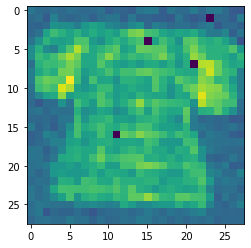

[[6]
 [4]
 [6]
 ...
 [7]
 [3]
 [2]]


In [ ]:
# Load training and testing data
x_train = np.load('/content/data/train_images.npy').astype("float32")/255.0
y_train = pd.read_csv('/content/data/train_labels.csv', usecols= ['label']).to_numpy()
x_test = np.load('/content/data/test_images.npy').astype("float32")/255.0


import skimage
from skimage import data, io, filters, feature
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage.transform import resize
import cv2


# x_resized_train = np.empty((x_train.shape[0], 32, 32))
# for i in range(len(x_train)):
#   x_resized_train[i] = resize(x_train[i], (32,32))

# x_train = np.repeat((x_resized_train / x_resized_train.max()).astype("float32")[..., np.newaxis], 3, -1)
# x_test = np.repeat((x_resized_train / x_resized_train.max()).astype("float32")[..., np.newaxis], 3, -1)
print(x_train.shape)

x_train = x_train.reshape((50000,28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

show_image(x_train[0])
print(y_train)


In [ ]:
print(x_train.shape)

(50000, 28, 28, 1)


In [ ]:
print(x_train.shape)

y_train = tf.keras.utils.to_categorical(y_train)
print(y_train)
print(y_train.shape)


(50000, 28, 28, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(50000, 10)


Model #1

In [ ]:
# Preprocess
from tensorflow.keras.optimizers import SGD
def model2(): # lr 0.0001: 89.95% val | not 0.001, 0.005
  with strategy.scope():
    model = models.Sequential()
    model.add(Dense(256, activation='relu', input_shape=(28,28,1)))
    model.add(Dense(256, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
    # model.add(layers.GaussianNoise(0.01))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
        
        
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                    data_format='channels_last'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.build()

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005, decay=1e-6), 
                  loss=tf.keras.losses.CategoricalCrossentropy(), 
                  metrics=['accuracy'],
                  steps_per_execution = 100)
    model.summary()
    return model
def model3():
  with strategy.scope():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy'])
    return model
def model4():
  with strategy.scope():
    mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3), pooling='avg')
    mobilenet.trainable = True

    model = models.Sequential()
    # model.add(layers.Lambda(lambda image: resize_images(x=image, height_factor=2, width_factor=2, data_format='channels_last'), input_shape=(28,28,3)))
    model.add(mobilenet)
    # model.add(Dropout(0.5))

    # model.add(Flatten())
    model.add(Dense(256, activation='relu'))   
    model.add(Dropout(0.25))
    # model.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    model.build()
    model.compile(optimizer="adam", 
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=['accuracy'],
                steps_per_execution = 100)
    model.summary()
    return model

In [ ]:

# model.fit(x_train, y_train, epochs=10, batch_size=32)

NameError: ignored

In [ ]:
# predictions = model.predict(x_test)

In [ ]:
# print(predictions)

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(5, shuffle=True, random_state=1)

scores, histories = list(), list()
for itrain, ival in kfold.split(x_train):

  model = model2()
  trainx = x_train[itrain]
  trainy = y_train[itrain]
  valx = x_train[ival]
  valy = y_train[ival]

  # trainx = np.repeat(trainx, 2, axis=0)
  # trainy = np.repeat(trainy, 2, axis=0)

  
  # for i in range(len(trainx)):
  #   trainx[i] = tf.image.random_flip_left_right(trainx[i])
  # import skimage
  # for i in range(len(trainx)):
  #   trainx[i] = layers.Lambda(lambda image: resize_images(x=trainx[i], height_factor=2, width_factor=2, data_format='channels_last'))

  history = model.fit(trainx, trainy, batch_size=64, epochs=40, validation_freq=5, validation_data=(valx,valy))

  loss, acc = model.evaluate(valx, valy, verbose=0)
  print('> %.3f' % (acc * 100.0))
  scores.append(acc)
  histories.append(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 28, 28, 256)       512       
                                                                 
 dense_115 (Dense)           (None, 28, 28, 256)       65792     
                                                                 
 conv2d_142 (Conv2D)         (None, 28, 28, 32)        73760     
                                                                 
 batch_normalization_168 (Ba  (None, 28, 28, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_143 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_169 (Ba  (None, 28, 28, 32)       128       
 tchNormalization)                                   

In [ ]:
model = model3()

x_train = np.repeat(x_train, 4, axis=0)
y_train = np.repeat(y_train, 4, axis=0)


import skimage
for i in range(len(x_train)):
  x_train[i] = skimage.util.random_noise(x_train[i], mode='gaussian')

history = model.fit(x_train, y_train, epochs=50, batch_size=64)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_362 (Conv2D)         (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_329 (Ba  (None, 28, 28, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_363 (Conv2D)         (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_330 (Ba  (None, 28, 28, 64)       256       
 tchNormalization)                                               
                                                                 
 dropout_427 (Dropout)       (None, 28, 28, 64)        0         
                                                                 
 conv2d_364 (Conv2D)         (None, 28, 28, 128)     

KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions)
plain_pred = list()

for i in range(len(predictions)):
  plain_pred.append(list(predictions[i]).index(max(predictions[i])))

print(plain_pred)
new_array = pd.DataFrame(plain_pred)
print(new_array)
new_array.to_csv('/content/new.csv')

[[6.12151837e-07 6.75842386e-07 4.88067381e-05 ... 1.04973522e-04
  7.40358175e-09 9.99709785e-01]
 [5.98723884e-04 5.64171598e-10 1.20521108e-07 ... 1.28108195e-05
  1.76101900e-09 5.98126266e-04]
 [2.71697936e-05 2.28754871e-07 9.99161482e-01 ... 8.01147256e-12
  3.85954131e-08 4.19011596e-11]
 ...
 [7.31359178e-04 4.77487883e-05 4.50430103e-02 ... 9.28685722e-07
  5.81001700e-07 4.62648222e-06]
 [8.84202450e-07 4.36346792e-10 5.24360394e-06 ... 1.95419947e-08
  9.99863982e-01 2.57219790e-06]
 [1.91141226e-06 4.77119544e-09 2.39996923e-04 ... 6.33695709e-06
  6.03017085e-08 1.08126005e-05]]
[9, 5, 2, 1, 8, 3, 8, 9, 9, 9, 3, 8, 3, 1, 5, 1, 3, 5, 7, 2, 1, 8, 7, 6, 3, 8, 9, 0, 5, 9, 7, 0, 8, 0, 7, 5, 7, 2, 1, 7, 5, 1, 0, 6, 1, 0, 0, 6, 1, 4, 8, 4, 4, 9, 4, 0, 8, 8, 1, 6, 5, 5, 2, 1, 7, 2, 2, 6, 4, 4, 6, 6, 5, 5, 5, 6, 9, 7, 0, 2, 2, 8, 0, 9, 3, 7, 9, 6, 3, 9, 6, 1, 1, 4, 7, 4, 2, 2, 3, 2, 1, 5, 7, 9, 4, 5, 9, 9, 8, 8, 4, 2, 6, 5, 5, 6, 2, 7, 1, 4, 2, 9, 3, 7, 2, 0, 8, 4, 8, 7, 9, 6, 4, 